In [31]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.utils import draw_path, generate_demonstrations, init_grid_world
from src.deepmaxent_irl_gridword import run_deepmaxent_irl
from src.maxent_irl_gridworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

## Maxent

In [10]:
np.random.seed(0)
BASIC_ARGS = """
--exp_name test
--height 6
--width 6
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)
coor_rates = [
    ((args.height-2, args.width-2), 1.0), 
    ((0, args.width-1), 0.5), 
    ((1, 1), 0.5)
]
init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

test
start positions:  [[4, 5]]


In [11]:
MAXENT_ARGS = """
--exp_name maxent_rand
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.1
--n_iters 100
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, coor_rates, init_start_pos=init_start_pos)

maxent_rand
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
1th trajectories.
s=(4, 5), a=l, r=0.0, s'=(3, 5) -> 
s=(3, 5), a=d, r=0.0, s'=(2, 5) -> 
s=(2, 5), a=d, r=0.0, s'=(1, 5) -> 
s=(1, 5), a=u, r=0.0, s'=(0, 5) -> 
s=(0, 5), a=r, r=0.5, s'=(0, 5) -> 
s=(0, 5), a=r, r=0.5, s'=(0, 5)
[INFO - n_trajs:1] Training MaxEnt IRL


  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.0918 0.0928 0.0929 0.0925 0.0927 1.    ]
 [0.092  0.0921 0.0923 0.0924 0.092  0.5544]
 [0.0923 0.0926 0.0928 0.0927 0.0919 0.5535]
 [0.0928 0.0922 0.0924 0.0918 0.0921 0.1557]
 [0.0923 0.093  0.0926 0.0923 0.0624 0.    ]
 [0.0922 0.0919 0.0927 0.0919 0.09   0.051 ]]
[INFO - n_trajs:1] Policy evaluation
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[2.4700e-02 4.8000e-03 1.3000e-03 5.0000e-04 2.0000e-04 1.0000e-04]
 [1.5170e-01 4.6300e-02 1.6500e-02 7.1000e-03 2.7000e-03 5.0000e-04]
 [4.9260e-01 2.4700e-01 1.4370e-01 8.8000e-02 4.2700e-02 5.3000e-03]
 [1.6967e+00 1.4281e+00 1.2596e+00 1.0434e+00 6.9610e-01 4.3700e-02]
 [2.5078e+00 2.1517e+00 1.8711e+00 1.4260e+00 6.7540e-01 6.8500e-02]
 [3.1430e+00 2.6683e+00 2.2567e+00 1.6891e+00 7.4740e-01 8.7500e-02]]
[INFO - n_trajs:1] Generating a new demonstrations from [(5, 0)]
2th trajectories.
s=(5, 0), a=r, r=0.0, s'=(5, 0) -> 
s=(5, 0), a=r, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.0926 0.0944 0.0935 0.0934 0.0929 1.    ]
 [0.0918 0.0933 0.0926 0.0935 0.0918 0.5474]
 [0.0934 0.0928 0.0938 0.0943 0.0929 0.5475]
 [0.0943 0.093  0.0943 0.0941 0.0944 0.1547]
 [0.0483 0.078  0.0863 0.0905 0.0631 0.    ]
 [0.1364 0.0859 0.1715 0.2605 0.3722 0.0485]]
[INFO - n_trajs:2] Policy evaluation
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[0.4525 0.1252 0.0325 0.0111 0.0079 0.0093]
 [1.0891 0.4763 0.1989 0.0773 0.0323 0.0213]
 [1.7455 0.9273 0.4828 0.2381 0.1161 0.0676]
 [2.799  2.0859 1.6571 1.3164 0.8907 0.1006]
 [3.6275 3.1543 2.8475 2.2859 1.1802 0.1619]
 [2.5368 1.8995 2.0002 2.1967 2.0927 0.6407]]
[INFO - n_trajs:2] Generating a new demonstrations from [(4, 0)]
3th trajectories.
s=(4, 0), a=r, r=0.0, s'=(4, 1) -> 
s=(4, 1), a=r, r=0.0, s'=(3, 1) -> 
s=(3, 1), a=r, r=0.0, s'=(2, 1) -> 
s=(2, 1), a=u, r=0.0, s'=(2, 0) -> 
s=(2, 0), a=u, r=0.0, s'=(1, 0) -> 
s=(1, 0), a=r, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[1.472e-01 1.446e-01 1.457e-01 1.466e-01 1.466e-01 1.000e+00]
 [5.735e-01 1.454e-01 1.469e-01 1.457e-01 1.450e-01 5.719e-01]
 [5.742e-01 5.715e-01 1.455e-01 1.477e-01 1.452e-01 5.725e-01]
 [8.000e-04 5.438e-01 1.455e-01 1.443e-01 1.476e-01 2.058e-01]
 [0.000e+00 2.565e-01 1.251e-01 1.450e-01 1.179e-01 5.680e-02]
 [2.170e-01 1.446e-01 3.688e-01 4.373e-01 5.036e-01 1.037e-01]]
[INFO - n_trajs:3] Policy evaluation
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[2.2107 2.8094 0.366  0.0854 0.0546 0.0642]
 [3.0077 2.9896 1.5395 0.3891 0.1876 0.1328]
 [3.3638 3.3489 2.3433 0.7464 0.3795 0.2935]
 [2.8037 2.9066 2.2522 2.0285 1.1815 0.2938]
 [2.5658 2.2188 3.1345 2.6934 2.4339 0.4515]
 [3.1151 2.8117 2.9831 3.024  2.575  2.1654]]
[INFO - n_trajs:3] Generating a new demonstrations from [(2, 0)]
4th trajectories.
s=(2, 0), a=u, r=0.0, s'=(1, 0) -> 
s=(1, 0), a=r, r=0.0, s'=(1, 1) -> 
s=(1, 1), a=s, r=0.5,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.1523 0.1528 0.1537 0.1521 0.1525 0.816 ]
 [0.562  1.     0.1273 0.1528 0.152  0.4833]
 [0.4105 0.3931 0.1469 0.1522 0.1558 0.4841]
 [0.     0.4521 0.1512 0.1548 0.1534 0.2052]
 [0.025  0.2467 0.1392 0.1541 0.1301 0.0814]
 [0.2325 0.173  0.4018 0.4445 0.4507 0.1188]]
[INFO - n_trajs:4] Policy evaluation
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[0.5885 0.4377 1.0957 0.4452 0.1631 0.1734]
 [0.655  0.5541 0.4436 0.6053 0.45   0.3344]
 [1.0695 0.4681 0.6417 1.3168 0.7891 0.6234]
 [1.2329 0.5264 0.8571 1.7886 1.5647 0.6017]
 [1.5599 0.6215 2.015  3.0326 2.8103 0.8304]
 [2.5098 1.64   3.3715 3.5318 3.1725 2.4977]]
[INFO - n_trajs:4] Generating a new demonstrations from [(5, 3)]
5th trajectories.
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.1536 0.1497 0.153  0.1522 0.1518 0.7859]
 [0.5502 1.     0.1317 0.1506 0.1536 0.4682]
 [0.392  0.3756 0.1455 0.1537 0.1541 0.4691]
 [0.     0.4314 0.1479 0.1525 0.1524 0.3809]
 [0.0204 0.2493 0.1358 0.1205 0.6699 0.066 ]
 [0.2063 0.1724 0.3509 0.3118 0.4921 0.0779]]
[INFO - n_trajs:5] Policy evaluation
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[0.937  0.6786 1.3552 0.8823 0.3183 0.3221]
 [0.9859 0.8664 0.6777 0.892  0.7826 0.5962]
 [1.4196 0.7322 0.9941 1.844  1.3378 1.0927]
 [1.5313 0.7971 1.3086 2.9986 2.6286 1.5067]
 [1.8779 0.9227 2.6081 2.3942 2.868  2.5263]
 [2.8223 2.0546 3.151  2.8377 2.9324 2.3869]]
[INFO - n_trajs:5] Generating a new demonstrations from [(5, 2)]
6th trajectories.
s=(5, 2), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.1474 0.1487 0.1487 0.1479 0.1476 0.758 ]
 [0.5358 1.     0.1253 0.1465 0.1454 0.4513]
 [0.3714 0.3549 0.1422 0.1447 0.1448 0.4511]
 [0.     0.4144 0.1436 0.1446 0.1476 0.4266]
 [0.0194 0.2413 0.1062 0.0939 0.9728 0.0509]
 [0.1872 0.1281 0.1881 0.461  0.5671 0.0659]]
[INFO - n_trajs:6] Policy evaluation
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[1.3013 0.9399 1.6226 1.3851 0.5218 0.5044]
 [1.3119 1.1895 0.9291 1.256  1.2108 0.9225]
 [1.7445 1.0134 1.3687 2.6447 2.2101 1.9119]
 [1.8371 1.1137 1.8605 1.8832 1.2134 2.7984]
 [2.2309 1.3171 1.519  1.1607 1.4046 1.1413]
 [2.89   2.1411 1.5277 1.76   1.6128 1.3526]]
[INFO - n_trajs:6] Generating a new demonstrations from [(5, 0)]
7th trajectories.
s=(5, 0), a=r, r=0.0, s'=(5, 1) -> 
s=(5, 1), a=r, r=0.0, s'=(5, 2) -> 
s=(5, 2), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0, s'=(5, 4) -> 
s=(5, 4), a=u, r=0.0, s'=(5, 5) -> 
s=(5, 5), a=u, r=0.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[0.1609 0.1651 0.1628 0.1621 0.165  0.7379]
 [0.5317 0.9924 0.1423 0.1626 0.1643 0.4502]
 [0.3654 0.3527 0.1552 0.1617 0.1638 0.4503]
 [0.0205 0.4093 0.1609 0.1635 0.1648 0.4242]
 [0.     0.2379 0.1147 0.1062 1.     0.0738]
 [0.1121 0.1245 0.2222 0.5062 0.6328 0.3507]]
[INFO - n_trajs:7] Policy evaluation
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[1.6482 1.2117 1.8964 1.8203 0.746  0.7001]
 [1.6274 1.5142 1.1882 1.635  1.6175 1.2509]
 [2.0409 1.3001 1.7174 3.0357 2.3918 2.4969]
 [2.114  1.4397 2.4568 2.1898 1.5828 2.9789]
 [2.5004 1.792  1.8922 1.5988 1.9614 1.6037]
 [2.5988 2.0732 1.8165 2.1947 2.2486 2.0934]]
[INFO - n_trajs:7] Generating a new demonstrations from [(2, 3)]
8th trajectories.
s=(2, 3), a=d, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.1332 0.1366 0.135  0.1316 0.1341 0.6156]
 [0.447  0.8517 0.1212 0.1104 0.131  0.375 ]
 [0.2991 0.2906 0.0983 0.3243 0.0742 0.3666]
 [0.0206 0.3388 0.1296 0.2255 0.2379 0.3449]
 [0.     0.1944 0.0721 0.0346 1.     0.0449]
 [0.0831 0.0891 0.1578 0.4302 0.5565 0.2989]]
[INFO - n_trajs:8] Policy evaluation
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[1.9702 1.4866 2.1813 2.317  1.0232 0.9378]
 [1.9275 1.8337 1.4777 2.3721 2.1601 1.6846]
 [2.3214 1.5999 2.1993 2.6619 1.4297 2.8988]
 [2.4204 1.8309 2.5701 1.7466 1.1405 2.1794]
 [2.8628 2.3119 1.3792 1.1206 1.397  1.136 ]
 [2.4542 1.7653 1.4135 1.6626 1.6097 1.6327]]
[INFO - n_trajs:8] Generating a new demonstrations from [(2, 5)]
9th trajectories.
s=(2, 5), a=d, r=0.0, s'=(3, 5) -> 
s=(3, 5), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(2, 4) -> 
s=(2, 4), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.12   0.1169 0.1196 0.1192 0.1164 0.5479]
 [0.3991 0.7722 0.1066 0.101  0.116  0.3094]
 [0.2609 0.2544 0.0967 0.2941 0.1939 0.2624]
 [0.0259 0.2989 0.1098 0.2121 0.5538 0.3343]
 [0.     0.1634 0.0343 0.0297 1.     0.021 ]
 [0.0685 0.0697 0.1259 0.3867 0.5181 0.2685]]
[INFO - n_trajs:9] Policy evaluation
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[2.2573 1.7557 2.4829 2.8433 1.3969 1.2383]
 [2.2093 2.1429 1.7702 2.6763 1.8115 2.2675]
 [2.5935 1.9233 2.7843 2.08   1.1918 2.15  ]
 [2.7622 2.3283 1.5059 1.2594 1.3462 1.4958]
 [3.0589 2.4996 1.205  1.1543 1.5478 1.1829]
 [2.3688 1.6353 1.3163 1.5664 1.5432 1.5635]]
[INFO - n_trajs:9] Generating a new demonstrations from [(4, 0)]
10th trajectories.
s=(4, 0), a=r, r=0.0, s'=(4, 0) -> 
s=(4, 0), a=r, r=0.0, s'=(4, 1) -> 
s=(4, 1), a=r, r=0.0, s'=(4, 2) -> 
s=(4, 2), a=r, r=0.0, s'=(4, 3) -> 
s=(4, 3), a=r, r=0.0, s'=(5, 3) -> 
s=(5, 3), a=r, r=0.0

  0%|          | 0/100 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.1287 0.1252 0.1248 0.1229 0.1257 0.5633]
 [0.4119 0.8063 0.1135 0.1065 0.123  0.3148]
 [0.2649 0.2604 0.1037 0.2992 0.2039 0.2661]
 [0.     0.2977 0.1164 0.2203 0.5731 0.3479]
 [0.0988 0.1888 0.1333 0.1527 1.     0.023 ]
 [0.0429 0.069  0.125  0.5172 0.5487 0.2763]]
[INFO - n_trajs:10] Policy evaluation


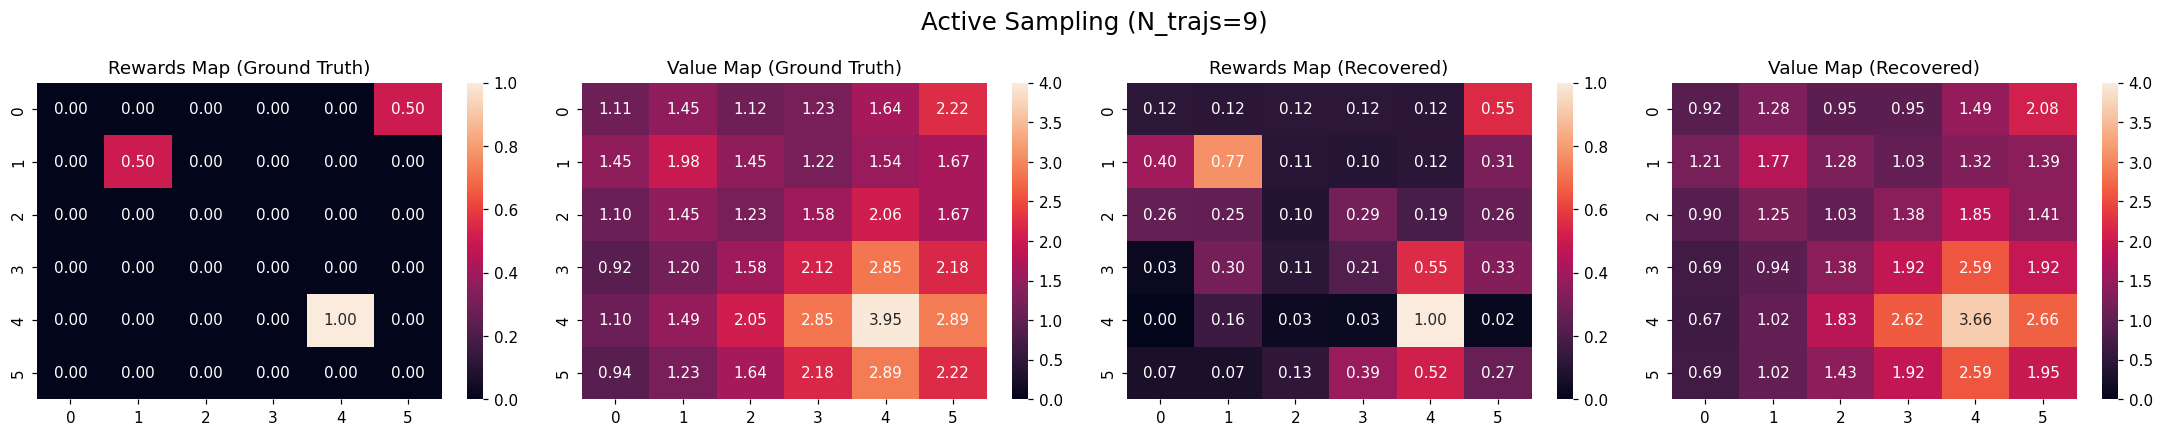

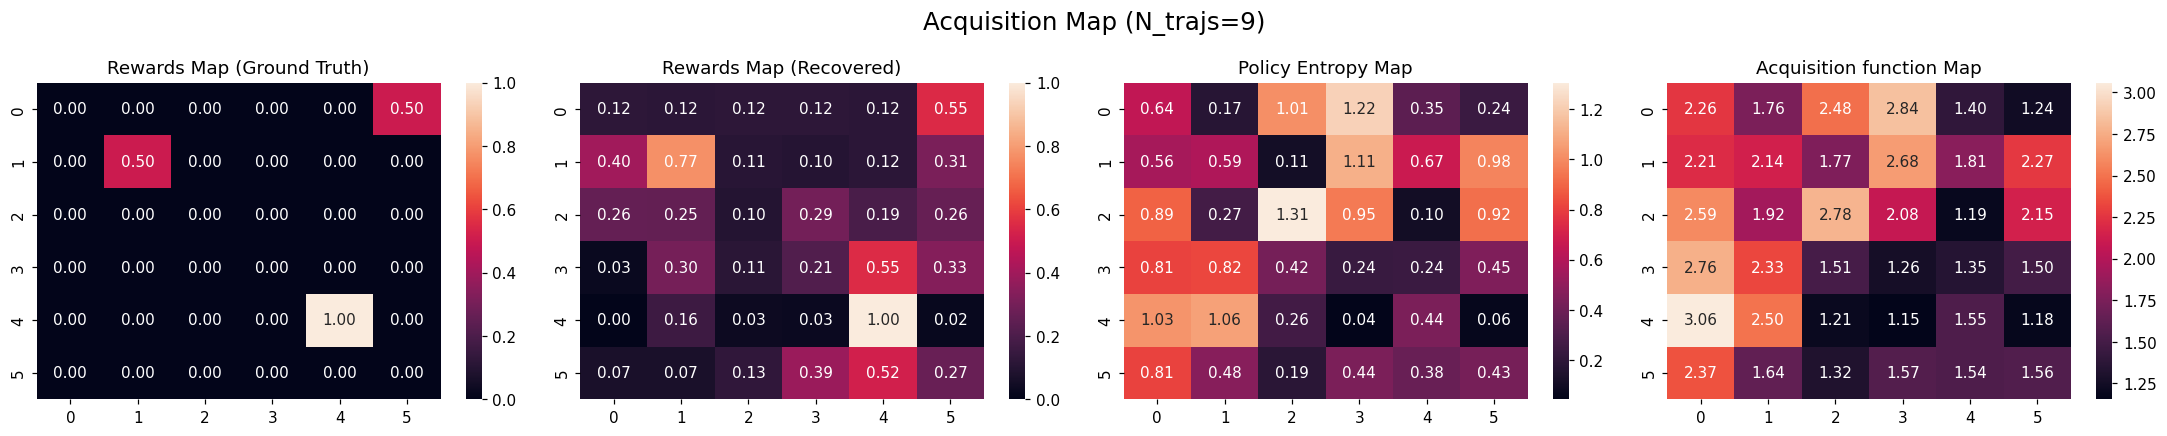

In [12]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [34]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.05
--n_iters 30
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 2.0
--weight_decay 1.5
--hiddens 3 3
--device cuda
--active
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, coor_rates, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Grid World
[INFO] Getting ground truth values and policy via value teration
[INFO] Initialize trajectories
1th trajectories.
s=(4, 5), a=l, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 3) -> 
s=(4, 3), a=r, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 3)
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[0.3849 0.3768 0.3591 0.1066 0.1173 0.3204]
 [0.2872 0.2135 0.3449 0.384  0.3243 0.1639]
 [0.4512 0.2268 0.3449 0.4301 0.3456 0.2043]
 [0.3287 0.2917 0.     0.0616 0.0923 0.294 ]
 [0.3432 0.428  0.2473 0.8082 1.     0.2164]
 [0.2862 0.0677 0.5213 0.2181 0.0981 0.1733]]
[INFO - n_trajs:1] Policy evaluation
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[4.5273 5.2703 5.4778 5.4791 5.2719 4.5274]
 [5.2706 5.8787 6.0585 6.0591 5.88   5.2717]
 [5.477  6.058  6.2274 6.2276 6.059  5.4786]
 [5.4775 6.0581 6.2273 6.2275 6.0588 5.4785]
 [5.2714 5.8795 6.0583 6.059  5.8809 5.2738]
 [4.5287 5.2725 5.4778 5.4798 5.2746 4.5313]]
[INFO - n_trajs:1] Generating a new demonstrations from [(2, 3)]
2th trajectories.
s=(2, 3), a=d, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(2, 4) -> 
s=(2, 4), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[0.3959 0.3709 0.2117 0.3698 0.3345 0.2069]
 [0.2719 0.2015 0.1963 0.0908 0.225  0.3952]
 [0.2625 0.2361 0.2157 0.4937 0.3404 0.3056]
 [0.3519 0.2772 0.2532 0.4114 0.6344 0.2148]
 [0.1527 0.223  0.2348 0.4993 1.     0.    ]
 [0.3025 0.3329 0.3076 0.3281 0.3377 0.0489]]
[INFO - n_trajs:2] Policy evaluation
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[4.4971 5.2479 5.4709 5.467  5.2721 4.5509]
 [5.2547 5.8671 6.0545 6.0552 5.8779 5.2734]
 [5.4728 6.0552 6.2264 6.2268 6.0638 5.489 ]
 [5.4734 6.0568 6.2266 6.227  6.0714 5.5132]
 [5.2753 5.88   6.0593 6.0647 5.912  5.342 ]
 [4.5218 5.2669 5.48   5.4952 5.3212 4.6102]]
[INFO - n_trajs:2] Generating a new demonstrations from [(3, 3)]
3th trajectories.
s=(3, 3), a=r, r=0.0, s'=(3, 2) -> 
s=(3, 2), a=r, r=0.0, s'=(3, 1) -> 
s=(3, 1), a=r, r=0.0, s'=(3, 2) -> 
s=(3, 2), a=r, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[0.418  0.5281 0.2162 0.5785 0.5673 0.2795]
 [0.     0.3539 0.3242 0.3401 0.1769 0.3863]
 [0.4599 0.9045 0.6744 0.2104 0.1064 0.4741]
 [0.6445 1.     0.5562 0.9121 0.6549 0.7338]
 [0.5395 0.8559 0.2981 0.4387 0.5026 0.645 ]
 [0.8804 0.6156 0.3476 0.8749 0.9058 0.5862]]
[INFO - n_trajs:3] Policy evaluation
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[4.5285 5.2713 5.478  5.4778 5.2711 4.5285]
 [5.2716 5.8794 6.0586 6.0585 5.8792 5.2712]
 [5.4782 6.0586 6.2275 6.2275 6.0584 5.4778]
 [5.478  6.0585 6.2275 6.2274 6.0584 5.4777]
 [5.2711 5.8792 6.0585 6.0584 5.879  5.271 ]
 [4.5279 5.271  5.4779 5.4776 5.2709 4.5283]]
[INFO - n_trajs:3] Generating a new demonstrations from [(2, 2)]
4th trajectories.
s=(2, 2), a=r, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(2, 4) -> 
s=(2, 4), a=d, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[0.4212 0.306  0.5317 0.5833 0.6637 0.2384]
 [0.2935 0.3468 0.6687 0.5776 0.4795 0.1351]
 [0.4487 0.4164 0.6647 0.968  0.9263 0.1255]
 [0.266  0.714  0.4989 0.7615 0.8997 0.2957]
 [0.3902 0.4955 0.578  0.543  1.     0.0247]
 [0.2231 0.1909 0.5082 0.5287 0.3891 0.    ]]
[INFO - n_trajs:4] Policy evaluation
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[4.5293 5.2758 5.4808 5.4801 5.2771 4.5427]
 [5.2754 5.884  6.0614 6.0621 5.8879 5.2858]
 [5.4818 6.0625 6.2295 6.2303 6.0681 5.4949]
 [5.4858 6.0636 6.2298 6.2306 6.0683 5.4947]
 [5.2799 5.8871 6.0626 6.0639 5.8938 5.2961]
 [4.5407 5.2827 5.483  5.4844 5.2898 4.5572]]
[INFO - n_trajs:4] Generating a new demonstrations from [(3, 3)]
5th trajectories.
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(3, 5) -> 
s=(3, 5), a=d, r=0.0, s'=(4, 5) -> 
s=(4, 5), a=l, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[0.5452 0.5268 0.5339 0.7081 0.1609 0.2509]
 [0.1562 0.2685 0.3763 0.3401 0.4824 0.5062]
 [0.0995 0.1387 0.3295 0.5081 0.5995 0.5921]
 [0.2694 0.5921 0.5441 0.6092 1.     0.6405]
 [0.6211 0.3647 0.4245 0.2343 0.6036 0.3458]
 [0.0891 0.2302 0.1987 0.1497 0.288  0.    ]]
[INFO - n_trajs:5] Policy evaluation
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[4.5234 5.2681 5.4757 5.4764 5.2752 4.5335]
 [5.2703 5.8784 6.0575 6.058  5.8809 5.2736]
 [5.4797 6.0596 6.2278 6.2274 6.0589 5.4785]
 [5.4797 6.0598 6.2282 6.228  6.0594 5.4797]
 [5.2725 5.8811 6.0605 6.061  5.8831 5.2776]
 [4.5351 5.275  5.4812 5.4817 5.2772 4.5391]]
[INFO - n_trajs:5] Generating a new demonstrations from [(3, 2)]
6th trajectories.
s=(3, 2), a=r, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[0.2657 0.0318 0.1775 0.0641 0.3917 0.0931]
 [0.2626 0.354  0.6126 0.1258 0.5774 0.5755]
 [0.6186 0.3176 0.     0.5616 0.3878 0.6142]
 [0.1552 0.706  0.3426 0.1827 1.     0.4558]
 [0.3031 0.6094 0.6327 0.4998 0.845  0.4203]
 [0.6162 0.0428 0.1587 0.08   0.1646 0.6791]]
[INFO - n_trajs:6] Policy evaluation
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[4.5291 5.2731 5.4797 5.4797 5.273  4.533 ]
 [5.2722 5.8804 6.0594 6.0595 5.8799 5.2727]
 [5.4774 6.0585 6.2277 6.2276 6.0584 5.4777]
 [5.4792 6.0591 6.2277 6.2276 6.0585 5.4786]
 [5.2712 5.8803 6.0597 6.0596 5.8802 5.2714]
 [4.525  5.2722 5.4801 5.4802 5.2721 4.5255]]
[INFO - n_trajs:6] Generating a new demonstrations from [(3, 2)]
7th trajectories.
s=(3, 2), a=r, r=0.0, s'=(3, 1) -> 
s=(3, 1), a=r, r=0.0, s'=(3, 2) -> 
s=(3, 2), a=r, r=0.0, s'=(2, 2) -> 
s=(2, 2), a=r, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[1.     0.4957 0.525  0.     0.3553 0.7476]
 [0.5422 0.3551 0.87   0.9957 0.9313 0.2047]
 [0.4585 0.4951 0.2247 0.2592 0.5519 0.1809]
 [0.5973 0.4293 0.2784 0.9064 0.558  0.3485]
 [0.5482 0.2258 0.3681 0.5352 0.5275 0.188 ]
 [0.6855 0.3011 0.2794 0.5186 0.8242 0.2946]]
[INFO - n_trajs:7] Policy evaluation
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[4.5245 5.2698 5.4782 5.4797 5.2716 4.5264]
 [5.2695 5.8786 6.0586 6.0593 5.88   5.2717]
 [5.4774 6.0581 6.2274 6.2277 6.0592 5.4791]
 [5.4771 6.0581 6.2275 6.2276 6.0591 5.479 ]
 [5.2699 5.8787 6.0585 6.0586 5.8796 5.2725]
 [4.5261 5.2704 5.4781 5.4778 5.2711 4.5297]]
[INFO - n_trajs:7] Generating a new demonstrations from [(2, 3)]
8th trajectories.
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[0.0447 0.138  0.1994 0.245  0.2484 0.2657]
 [0.1627 0.1508 0.1882 0.1147 0.3808 0.519 ]
 [0.4766 0.357  0.2134 0.5473 0.1382 0.0016]
 [0.4761 0.3663 0.3162 0.5811 0.536  0.4906]
 [0.     0.1824 0.3774 0.0426 1.     0.4608]
 [0.2919 0.0971 0.4017 0.1264 0.2515 0.0206]]
[INFO - n_trajs:8] Policy evaluation
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[4.5475 5.2817 5.482  5.479  5.2729 4.5322]
 [5.2813 5.8854 6.0617 6.0602 5.878  5.267 ]
 [5.4741 6.0575 6.2283 6.229  6.0625 5.4859]
 [5.4743 6.0581 6.2279 6.2284 6.0602 5.4815]
 [5.2784 5.8854 6.0609 6.0634 5.8886 5.2908]
 [4.5227 5.2762 5.4794 5.4885 5.2953 4.5709]]
[INFO - n_trajs:8] Generating a new demonstrations from [(2, 3)]
9th trajectories.
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(2, 3) -> 
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0,

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[0.5462 0.0108 0.2762 0.358  0.6539 0.2878]
 [0.5517 0.1448 0.3029 0.249  0.6172 0.3285]
 [0.3618 0.6461 0.3753 0.889  0.7386 0.1628]
 [0.831  0.     0.3271 0.8549 0.3927 0.1384]
 [0.1577 0.2115 0.4073 0.7789 1.     0.1096]
 [0.3587 0.1571 0.2768 0.6877 0.4562 0.6087]]
[INFO - n_trajs:9] Policy evaluation
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[4.5261 5.2713 5.4784 5.4782 5.2716 4.5302]
 [5.2698 5.8792 6.0589 6.059  5.88   5.2728]
 [5.4775 6.0583 6.2277 6.2279 6.0598 5.4801]
 [5.4763 6.058  6.2276 6.2278 6.0598 5.4801]
 [5.2715 5.8796 6.059  6.0588 5.8803 5.2728]
 [4.5279 5.2718 5.4787 5.478  5.2719 4.5273]]
[INFO - n_trajs:9] Generating a new demonstrations from [(2, 3)]
10th trajectories.
s=(2, 3), a=d, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 3) -> 
s=(3, 3), a=r, r=0.0, s'=(3, 4) -> 
s=(3, 4), a=d, r=0.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0, s'=(4, 4) -> 
s=(4, 4), a=s, r=1.0

  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[0.1864 0.1671 0.1755 0.3034 0.3346 0.4293]
 [0.2497 0.12   0.204  0.1785 0.1374 0.0456]
 [0.3538 0.0925 0.1636 0.5044 0.2432 0.4307]
 [0.2025 0.2843 0.2464 0.7752 1.     0.4439]
 [0.1725 0.2682 0.2224 0.3289 0.9253 0.2575]
 [0.1795 0.406  0.517  0.     0.224  0.0919]]
[INFO - n_trajs:10] Policy evaluation


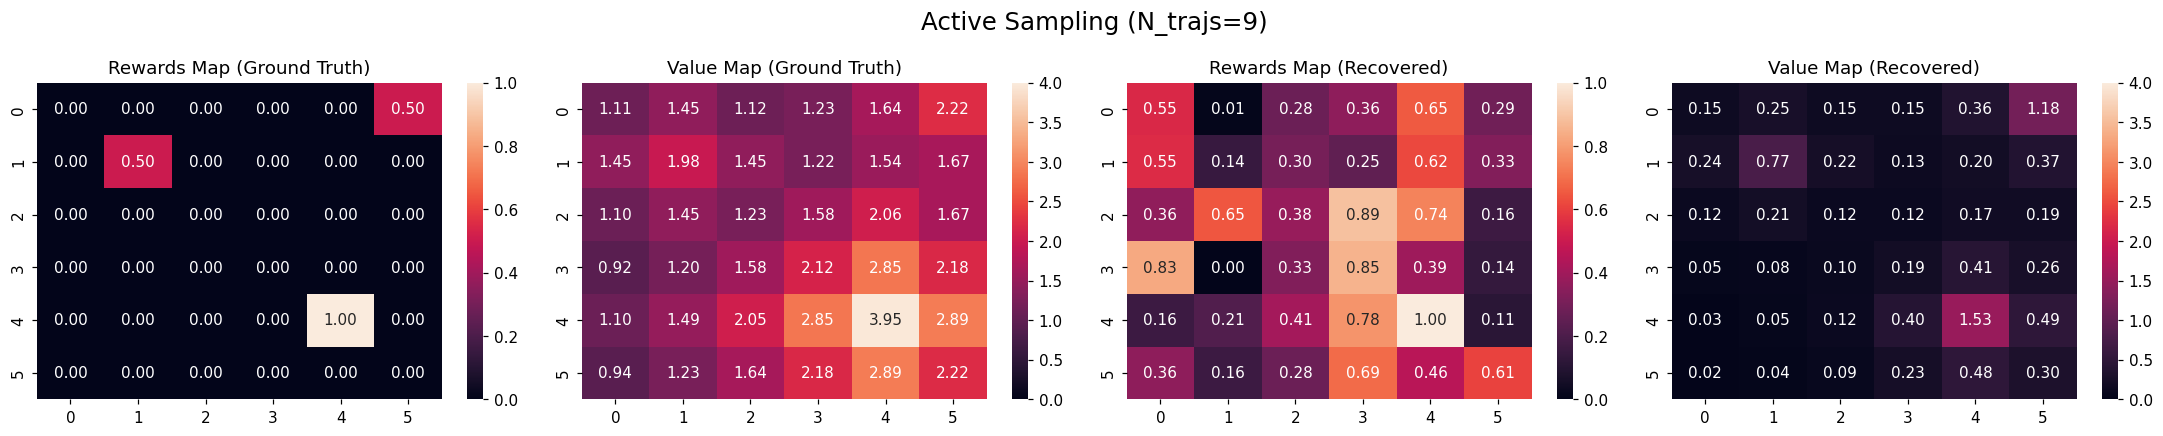

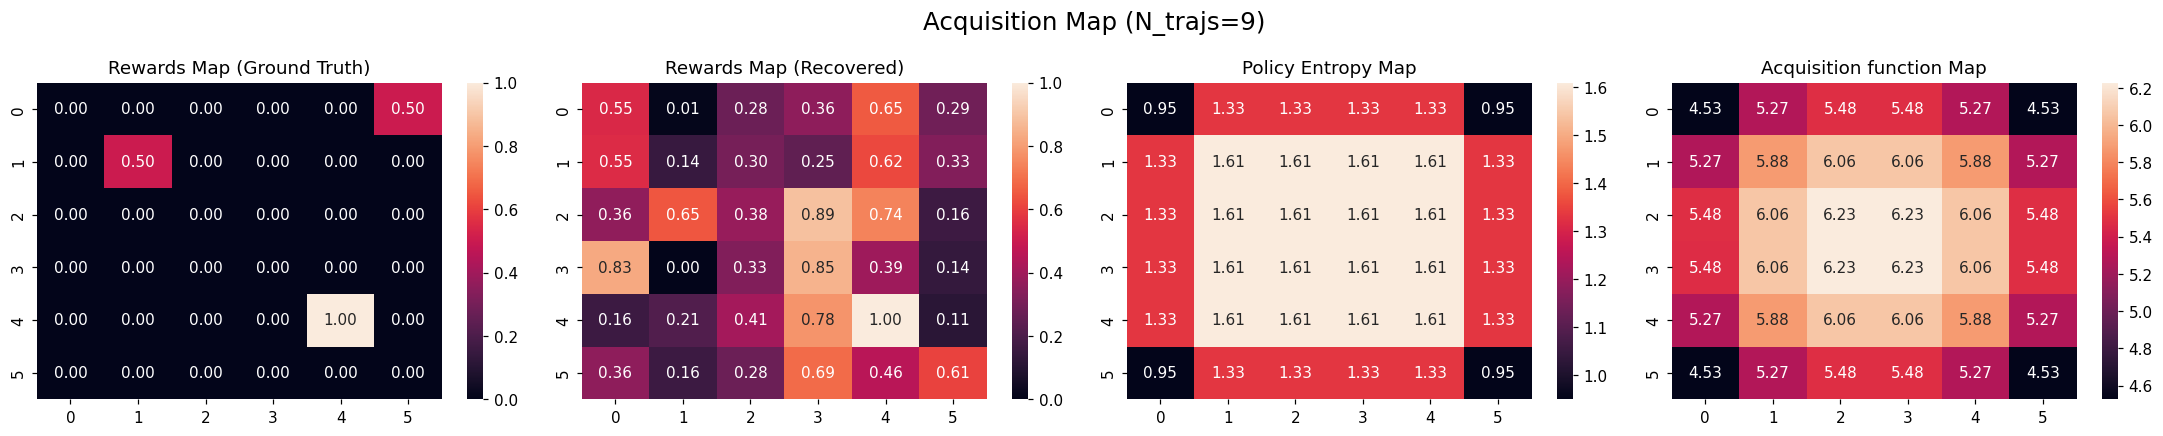

In [35]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)